In [1]:
import pandas as pd

df = pd.read_csv('china_reroute_model_ready.csv', parse_dates=['date'])
print("Loaded shape:", df.shape)
print(df.columns.tolist())
df.head(3)


Loaded shape: (1023, 53)
['date', 'package_count', 'day_of_week', 'is_friday', 'is_holiday', 'is_after_holiday', 'is_manual_closure', 'is_closed_day', 'is_post_event_window', 'is_open_day', 'day_after_closed', 'lag1', 'lag7', 'rolling7', 'rolling14', 'rolling30', 'growth_rate', 'is_active_SG', 'is_active_CZ', 'is_active_AE', 'is_active_MY', 'is_active_CN', 'SG', 'CZ', 'AE', 'MY', 'CN', 'FR', 'NL', 'growth_SG', 'growth_CZ', 'growth_AE', 'growth_MY', 'growth_CN', 'rolling7_SG', 'rolling7_CZ', 'rolling7_AE', 'rolling7_MY', 'rolling7_CN', 'share_SG', 'share_CZ', 'share_AE', 'share_MY', 'share_CN', 'month', 'day_of_year', 'weekofyear', 'n_active_china_routes', 'dominant_country', 'china_rolling7_std', 'is_promo_day', 'days_since_promo', 'total_china_rerouted']


,date,package_count,day_of_week,is_friday,is_holiday,is_after_holiday,is_manual_closure,is_closed_day,is_post_event_window,is_open_day,...,share_CN,month,day_of_year,weekofyear,n_active_china_routes,dominant_country,china_rolling7_std,is_promo_day,days_since_promo,total_china_rerouted
0,2022-01-03,1,0,0,0,0,0,0,0,1,...,0.0,1,3,1,0,SG,0.000000,0,NaN,0
1,2022-01-04,8,1,0,0,0,0,0,0,1,...,0.0,1,4,1,0,SG,0.000000,0,NaN,0
2,2022-01-05,186,2,0,0,0,0,0,0,1,...,0.0,1,5,1,0,SG,99.881597,0,NaN,173


In [2]:
df.columns

Index(['date', 'package_count', 'day_of_week', 'is_friday', 'is_holiday',
       'is_after_holiday', 'is_manual_closure', 'is_closed_day',
       'is_post_event_window', 'is_open_day', 'day_after_closed', 'lag1',
       'lag7', 'rolling7', 'rolling14', 'rolling30', 'growth_rate',
       'is_active_SG', 'is_active_CZ', 'is_active_AE', 'is_active_MY',
       'is_active_CN', 'SG', 'CZ', 'AE', 'MY', 'CN', 'FR', 'NL', 'growth_SG',
       'growth_CZ', 'growth_AE', 'growth_MY', 'growth_CN', 'rolling7_SG',
       'rolling7_CZ', 'rolling7_AE', 'rolling7_MY', 'rolling7_CN', 'share_SG',
       'share_CZ', 'share_AE', 'share_MY', 'share_CN', 'month', 'day_of_year',
       'weekofyear', 'n_active_china_routes', 'dominant_country',
       'china_rolling7_std', 'is_promo_day', 'days_since_promo',
       'total_china_rerouted'],
      dtype='object')

# OUTLIERS

In [3]:
import numpy as np

# Percentile method (let's use 99.5th)
perc = 98
outlier_cut = np.percentile(df['package_count'], perc)
df['is_outlier'] = (df['package_count'] > outlier_cut).astype(int)

# IQR method (for your info)
Q1 = df['package_count'].quantile(0.25)
Q3 = df['package_count'].quantile(0.75)
IQR = Q3 - Q1
iqr_cut = Q3 + 1.5 * IQR
df['is_iqr_outlier'] = (df['package_count'] > iqr_cut).astype(int)

print(f"Percentile outlier threshold ({perc}th): {outlier_cut}")
print(f"IQR outlier threshold: {iqr_cut}")

# To visualize:
outlier_days = df[df['is_outlier'] == 1][['date', 'package_count', 'growth_rate', 'SG', 'CZ', 'AE', 'MY', 'CN']]


Percentile outlier threshold (98th): 11219.079999999998
IQR outlier threshold: 13233.25


In [4]:
print(f"Number of outlier days: {outlier_days.shape[0]}")

Number of outlier days: 21


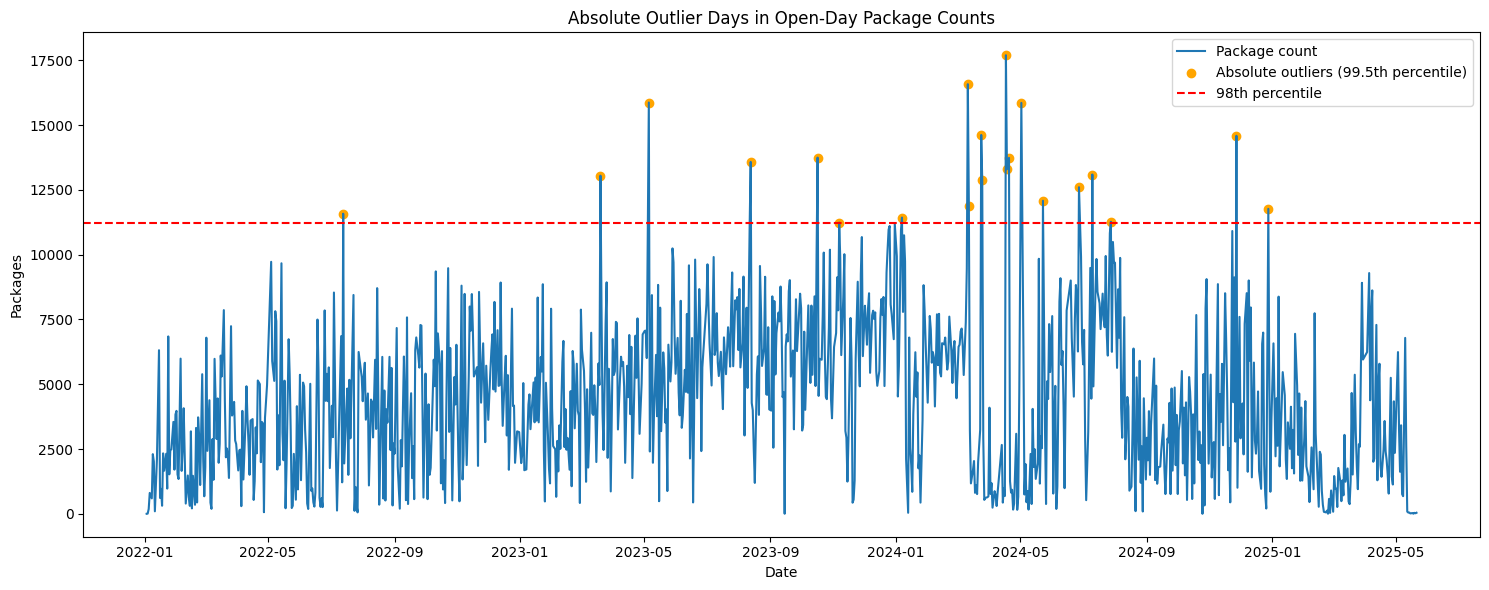

In [5]:
import matplotlib.pyplot as plt

# Assume 'is_outlier' was set as shown above
outlier_days = df[df['is_outlier'] == 1]

plt.figure(figsize=(15,6))
plt.plot(df['date'], df['package_count'], label='Package count')
plt.scatter(outlier_days['date'], outlier_days['package_count'], color='orange', label='Absolute outliers (99.5th percentile)')
plt.axhline(outlier_cut, color='red', linestyle='--', label=f'{perc}th percentile')
plt.xlabel('Date')
plt.ylabel('Packages')
plt.title('Absolute Outlier Days in Open-Day Package Counts')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
# Display the 16 absolute outlier days with business context
outlier_days = df[df['is_outlier'] == 1] 
"""[[
    'date', 'package_count', 'growth_rate', 'is_promo_day',
    'is_after_holiday', 'is_manual_closure', 'SG', 'CZ', 'AE', 'MY', 'CN', 'dominant_country',"days_since_promo" , "month"
]]"""

# Sort for readability
outlier_days = outlier_days.sort_values('date').reset_index(drop=True)
display(outlier_days)


,date,package_count,day_of_week,is_friday,is_holiday,is_after_holiday,is_manual_closure,is_closed_day,is_post_event_window,is_open_day,...,day_of_year,weekofyear,n_active_china_routes,dominant_country,china_rolling7_std,is_promo_day,days_since_promo,total_china_rerouted,is_outlier,is_iqr_outlier
0,2022-07-13,11580,2,0,0,0,0,0,0,1,...,194,28,2,CZ,3907.154798,0,NaN,10585,1,0
1,2023-03-20,13048,0,0,0,0,0,0,0,1,...,79,12,2,CZ,3787.125773,0,98.0,12032,1,0
2,2023-05-06,15871,5,0,0,0,0,0,0,1,...,126,18,2,CZ,4070.617456,0,145.0,15054,1,1
3,2023-08-13,13578,6,0,0,0,0,0,0,1,...,225,32,2,CZ,3759.374137,0,244.0,12868,1,1
4,2023-10-17,13744,1,0,0,0,0,0,0,1,...,290,42,2,CZ,2709.192341,0,309.0,11988,1,1
5,2023-11-07,11238,1,0,0,0,0,0,0,1,...,311,45,2,CZ,2696.149044,0,330.0,10962,1,0
6,2024-01-07,11431,6,0,0,0,0,0,1,1,...,7,1,1,CZ,2821.305473,0,26.0,11416,1,0
7,2024-03-11,16578,0,0,0,0,0,0,0,1,...,71,11,2,CZ,4899.783669,0,90.0,15377,1,1
8,2024-03-12,11895,1,0,0,0,0,0,0,1,...,72,11,2,CZ,5182.947681,0,91.0,10534,1,0
9,2024-03-24,14618,6,0,0,0,0,0,0,1,...,84,12,1,CZ,4857.793865,0,103.0,13506,1,1


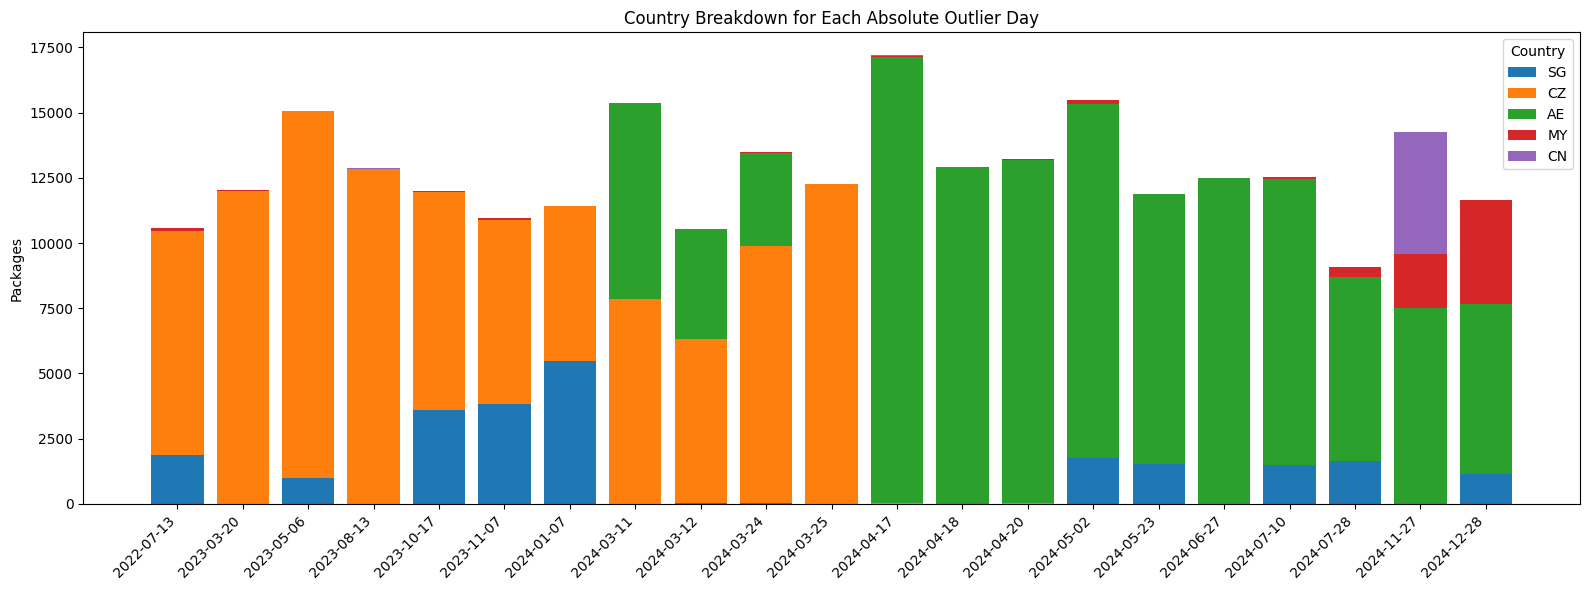

In [45]:
import matplotlib.pyplot as plt

# Choose countries to plot
china_reroute_countries = ['SG', 'CZ', 'AE', 'MY', 'CN']

# For easier reading, set the date as x-axis labels
outlier_days_sorted = outlier_days.sort_values('date').reset_index(drop=True)
labels = outlier_days_sorted['date'].astype(str)

# Create a stacked bar plot
plt.figure(figsize=(16, 6))
bottom = None
for c in china_reroute_countries:
    plt.bar(labels, outlier_days_sorted[c], bottom=bottom, label=c)
    if bottom is None:
        bottom = outlier_days_sorted[c].copy()
    else:
        bottom += outlier_days_sorted[c].values

plt.xticks(rotation=45, ha='right')
plt.ylabel('Packages')
plt.title('Country Breakdown for Each Absolute Outlier Day')
plt.legend(title='Country', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


Country Breakdown of Outlier Days

The analysis of absolute outlier days reveals a strong pattern: each outlier is dominated by a single China-reroute country at a time, with a clear regime shift from Czech Republic (CZ) in 2023 and early 2024 to United Arab Emirates (AE) from March 2024 onward. These outliers do not reflect multi-country surges, but rather operational or logistical shocks concentrated in the dominant reroute channel of the period. This underscores the importance of monitoring and modeling country-specific flows, as well as investigating major changes in international routing agreements or transport availability.

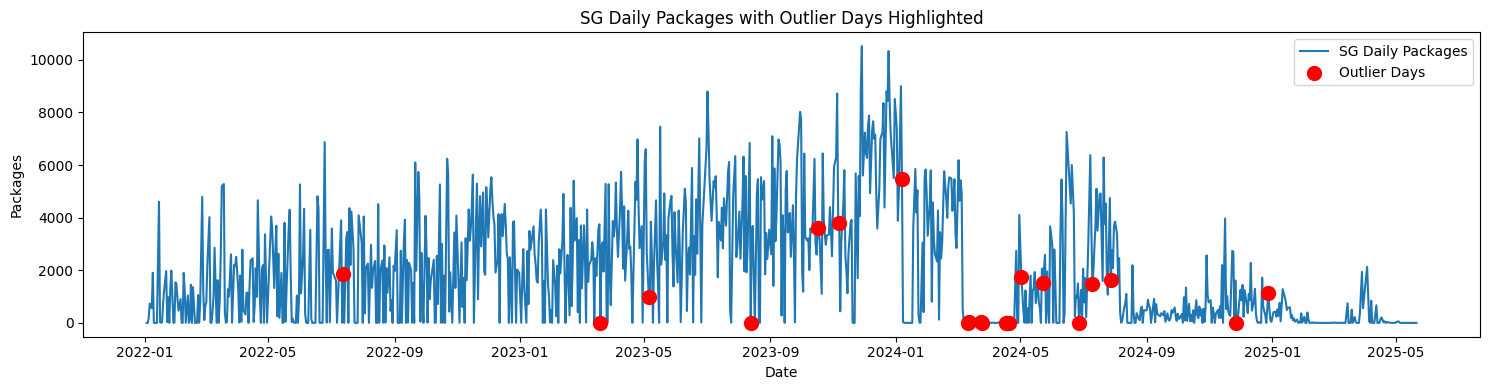

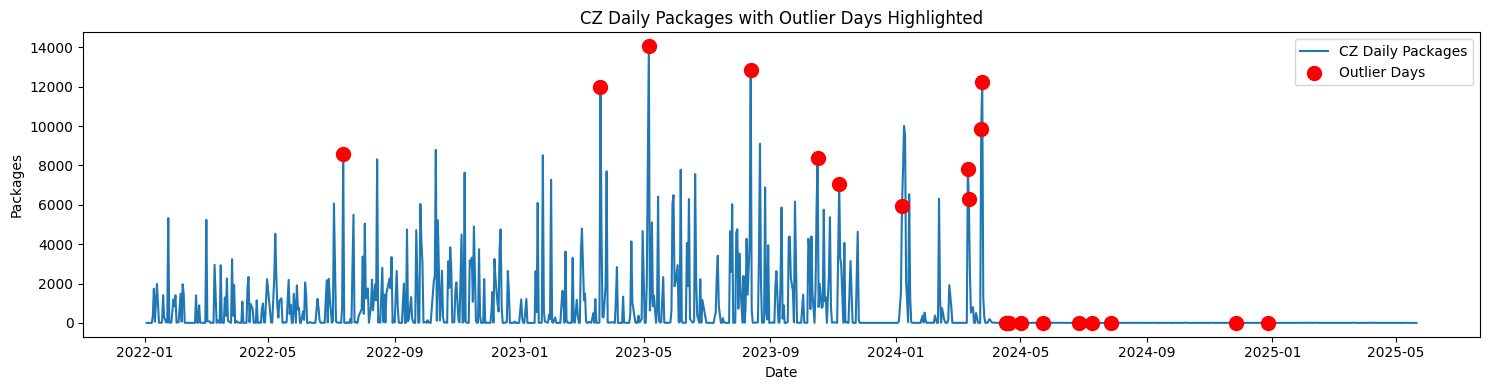

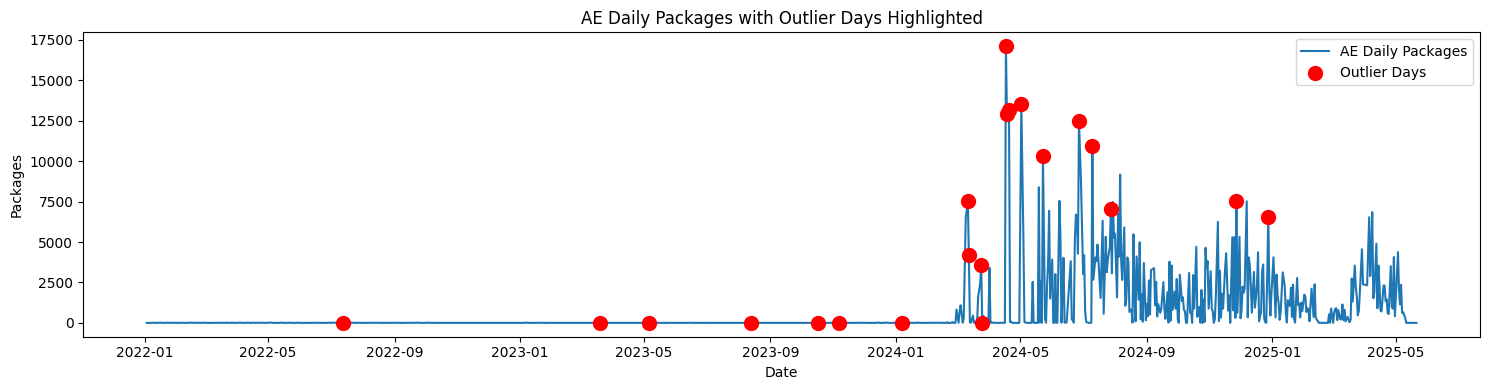

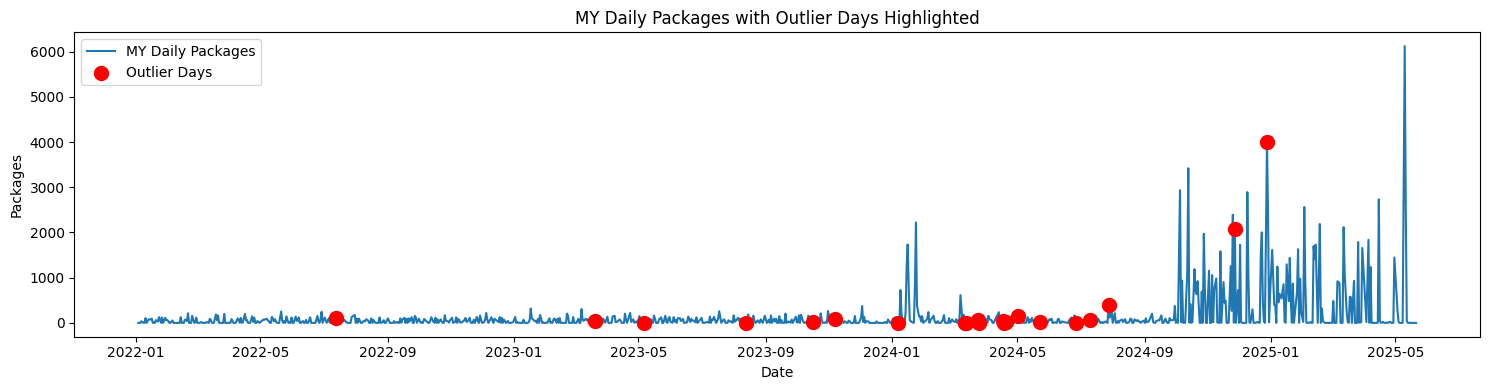

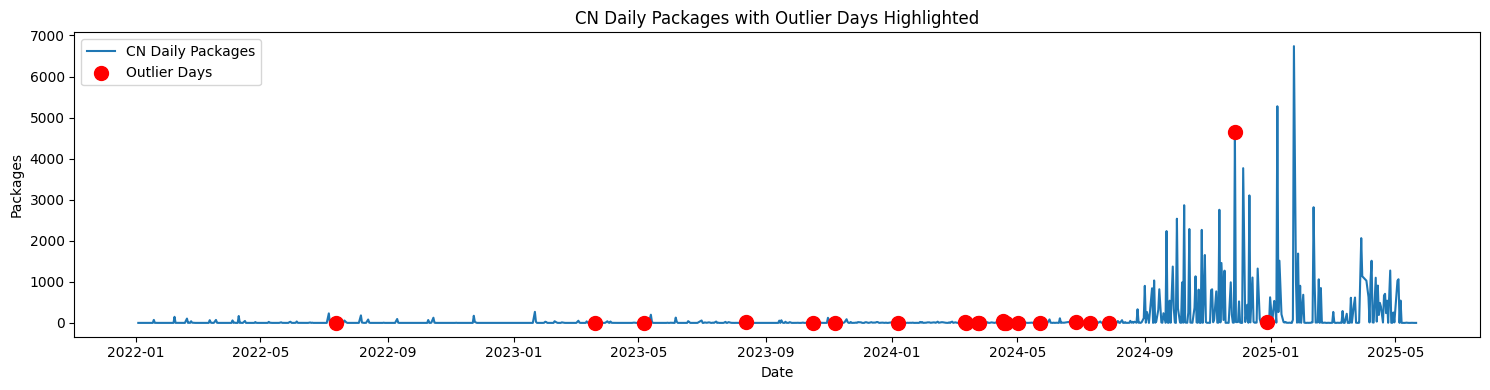

In [47]:
import matplotlib.pyplot as plt

china_countries = ['SG', 'CZ', 'AE', 'MY', 'CN']

for c in china_countries:
    plt.figure(figsize=(15, 4))
    plt.plot(df['date'], df[c], label=f'{c} Daily Packages')
    # Overlay outlier points for this country
    plt.scatter(outlier_days['date'], outlier_days[c], color='red', s=100, label='Outlier Days', zorder=5)
    plt.xlabel('Date')
    plt.ylabel('Packages')
    plt.title(f'{c} Daily Packages with Outlier Days Highlighted')
    plt.legend()
    plt.tight_layout()
    plt.show()


## Country-by-Country Analysis of Absolute Outlier Days

To understand what drives the rare, extreme-volume “outlier” days in Algeria’s international package flows, we visualized each main China reroute country’s daily time series, highlighting the system-wide outlier days.

### Key Findings

- **Outlier days are almost always caused by an extreme spike in a *single* reroute country at a time.**
    - **2023 to early 2024:** Outliers are dominated by the Czech Republic (CZ). Every flagged outlier day in this period is a massive CZ surge, far above its normal values.
    - **From spring 2024 onward:** Outliers switch suddenly to the United Arab Emirates (AE). AE outlier points correspond to the largest AE volumes ever recorded, while CZ drops to nearly zero.
    - **SG (Singapore), MY (Malaysia), and CN (China)** are never primary contributors—on most outlier days, their volumes are normal or even low.

- **This regime shift from CZ to AE is abrupt, not gradual**, and likely reflects a real-world operational or contractual change in how “China Road” packages are routed.

- **No outlier day is caused by a multi-country surge**—almost all are driven by a single reroute country being overloaded or acting as the sole gateway on that day.

### Operational and Modeling Implications

- **Country-level monitoring is essential:** System-wide anomalies and forecast errors are overwhelmingly the result of country-specific shocks, not general trends.
- **Regime changes must be accounted for:** Shifts in dominant reroute country drive sudden changes in the volume and volatility of package flows, which in turn create operational “outlier” days.
- **Anomaly and outlier detection should always incorporate country context and regime features** to provide actionable insight for planning and risk management.

**In summary:** The largest, rarest operational outliers in Algeria’s inbound package flows are not random—they’re the direct result of country-level regime shifts in the China Road routing network. Recognizing and anticipating these transitions is critical for both robust modeling and real-world logistics planning.


# JUMPS

(75, 14)


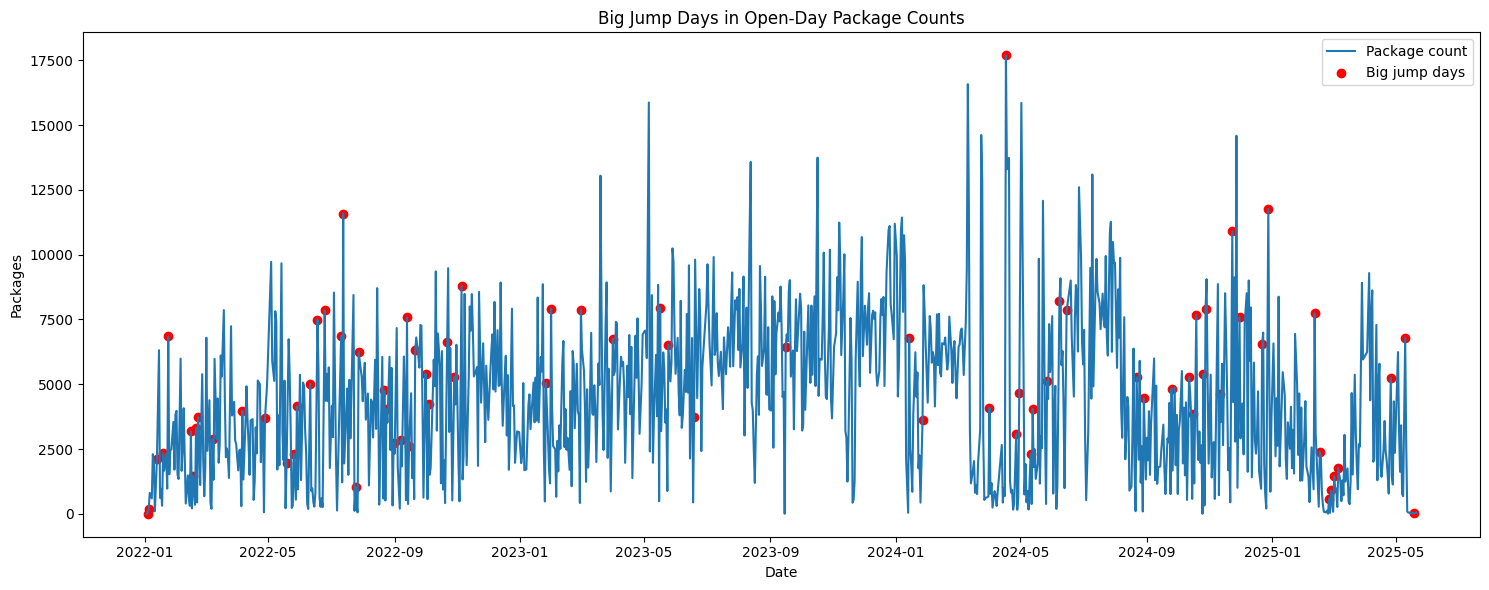

In [7]:
# Flag big jumps using existing growth_rate
jump_threshold = 5.0 # or adjust as needed
df['is_big_jump'] = (df['growth_rate'] > jump_threshold).astype(int)

# Extract jump days
jump_days = df[df['is_big_jump'] == 1][[
    'date', 'package_count', 'lag1', 'growth_rate',
    'is_promo_day', 'is_after_holiday', 'is_manual_closure',
    'SG', 'CZ', 'AE', 'MY', 'CN' , 'day_after_closed', 'days_since_promo'
]]
print(jump_days.shape)

# Optional: Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(df['date'], df['package_count'], label='Package count')
plt.scatter(jump_days['date'], jump_days['package_count'], color='red', label='Big jump days')
plt.xlabel('Date'); plt.ylabel('Packages')
plt.title('Big Jump Days in Open-Day Package Counts')
plt.legend(); plt.tight_layout(); plt.show()


In [ ]:
# Sort jump days by descending growth_rate and display the top 10
jump_days_sorted = jump_days.sort_values('growth_rate', ascending=False).reset_index(drop=True)
jump_days_sorted


,date,package_count,lag1,growth_rate,is_promo_day,is_after_holiday,is_manual_closure,SG,CZ,AE,MY,CN,day_after_closed,days_since_promo
0,2024-10-26,5393,1.0,5392.000000,0,0,0,538,0,1451,694,2265,1,319.0
1,2023-09-16,6450,3.0,2149.000000,0,0,0,5057,3,0,63,64,1,278.0
2,2024-01-14,6803,40.0,169.075000,0,0,0,0,6540,0,238,0,0,33.0
3,2025-02-25,575,4.0,142.750000,0,0,0,0,0,531,0,3,0,75.0
4,2022-07-28,6245,56.0,110.517857,0,0,0,4091,340,9,129,0,0,NaN
5,2022-04-28,3706,62.0,58.774194,0,0,0,3368,14,0,40,0,0,NaN
6,2024-12-28,11767,205.0,56.400000,0,0,0,1128,3,6521,3991,12,0,16.0
7,2022-07-11,6854,127.0,52.968504,0,0,0,3898,2,4,45,19,0,NaN
8,2024-08-22,5264,103.0,50.106796,0,0,0,372,3,4108,77,28,0,254.0
9,2024-08-29,4458,90.0,48.533333,0,0,0,486,1,3703,26,17,0,261.0


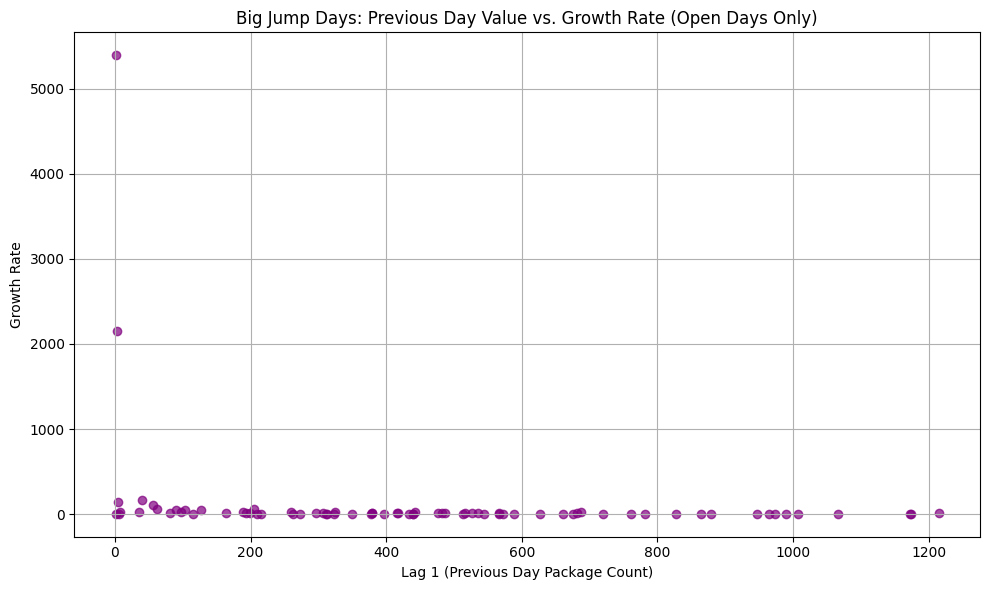

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(jump_days_sorted['lag1'], jump_days_sorted['growth_rate'], color='purple', alpha=0.7)
plt.xlabel('Lag 1 (Previous Day Package Count)')
plt.ylabel('Growth Rate')
plt.title('Big Jump Days: Previous Day Value vs. Growth Rate (Open Days Only)')
plt.grid(True)
plt.tight_layout()
plt.show()


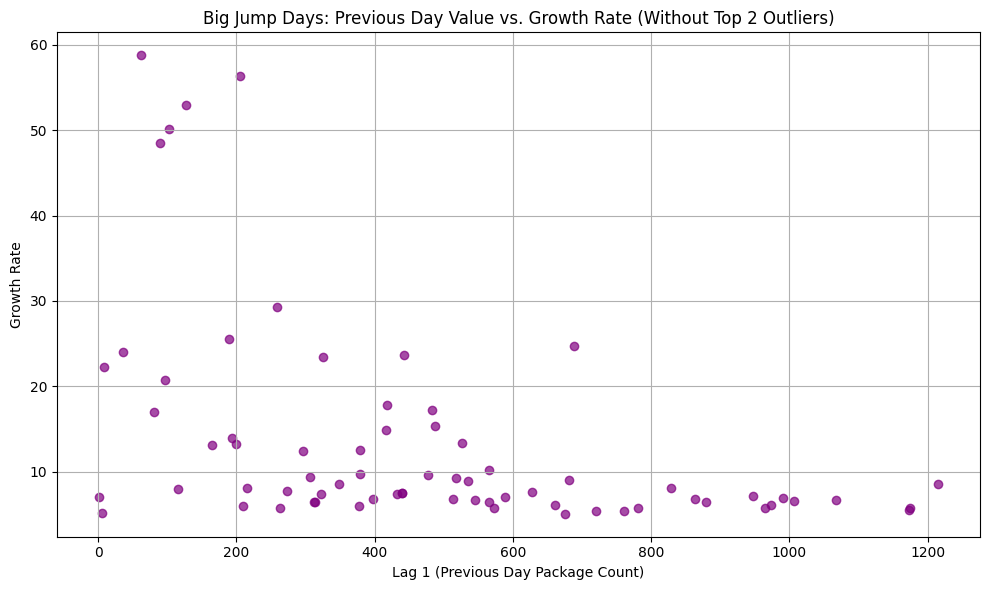

In [9]:
# Drop the two largest growth rates
jump_days_no_outliers = jump_days_sorted.nsmallest(len(jump_days_sorted)-5, 'growth_rate')

plt.figure(figsize=(10,6))
plt.scatter(jump_days_no_outliers['lag1'], jump_days_no_outliers['growth_rate'], color='purple', alpha=0.7)
plt.xlabel('Lag 1 (Previous Day Package Count)')
plt.ylabel('Growth Rate')
plt.title('Big Jump Days: Previous Day Value vs. Growth Rate (Without Top 2 Outliers)')
plt.grid(True)
plt.tight_layout()
plt.show()


Locator attempting to generate 88100 ticks ([9.07998595249697e-05, ..., 10686248594096.041]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 88100 ticks ([9.07998595249697e-05, ..., 10686248594096.041]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 88100 ticks ([9.07998595249697e-05, ..., 10686248594096.041]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 88100 ticks ([9.07998595249697e-05, ..., 10686248594096.041]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 88100 ticks ([9.07998595249697e-05, ..., 10686248594096.041]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 88100 ticks ([9.07998595249697e-05, ..., 10686248594096.041]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 88100 ticks ([9.07998595249697e-05, ..., 10686248594096.041]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 88100 ticks ([9.07998595249697e-05, ..

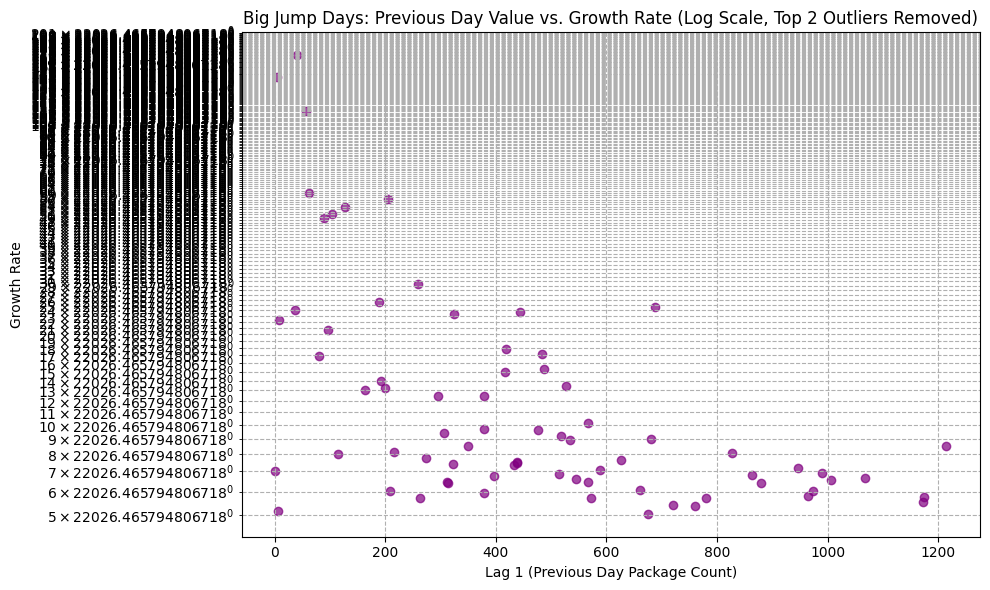

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

# Drop the two largest growth rates
jump_days_no_outliers = jump_days_sorted.nsmallest(len(jump_days_sorted)-2, 'growth_rate')  # -2, not -5

plt.figure(figsize=(10,6))
plt.scatter(jump_days_no_outliers['lag1'], jump_days_no_outliers['growth_rate'], color='purple', alpha=0.7)
plt.xlabel('Lag 1 (Previous Day Package Count)')
plt.ylabel('Growth Rate')
plt.title('Big Jump Days: Previous Day Value vs. Growth Rate (Log Scale, Top 2 Outliers Removed)')
plt.yscale('log', base=np.exp(10))
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


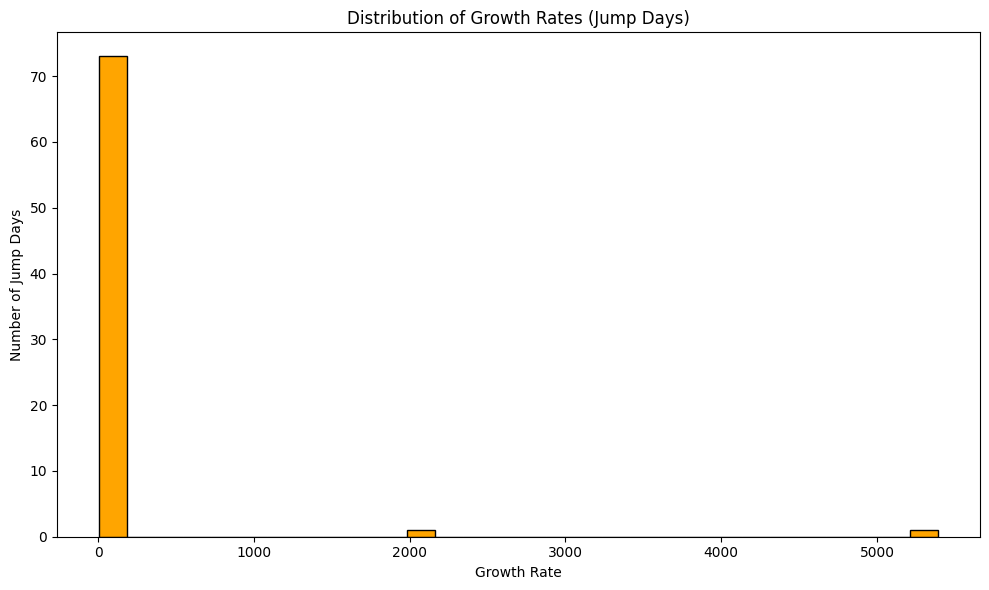

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(jump_days_sorted['growth_rate'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Growth Rate')
plt.ylabel('Number of Jump Days')
plt.title('Distribution of Growth Rates (Jump Days)')
plt.tight_layout()
plt.show()


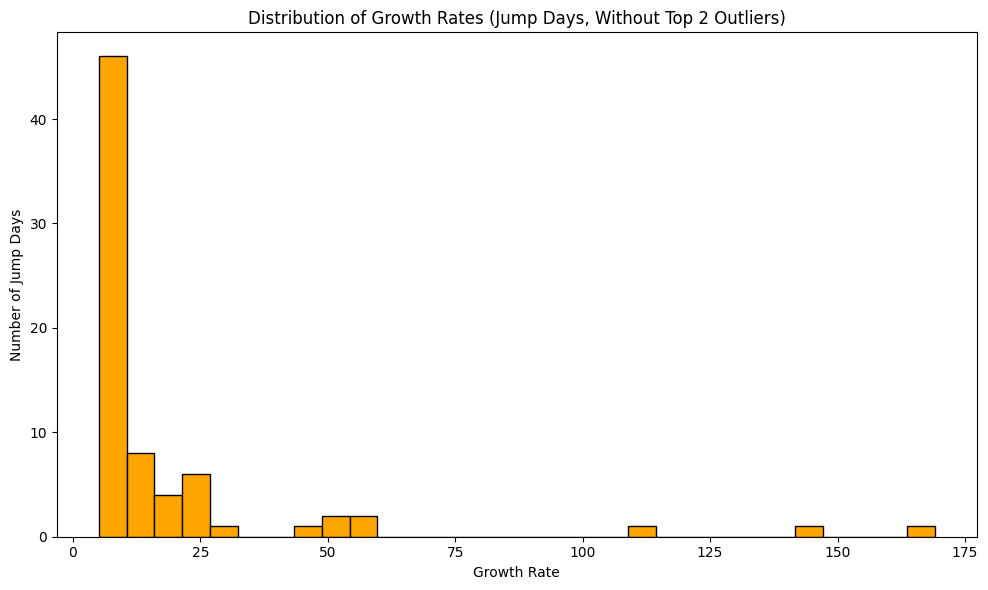

In [62]:
# Drop the two largest growth rates
jump_days_no_outliers = jump_days_sorted.nsmallest(len(jump_days_sorted)-2, 'growth_rate')

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(jump_days_no_outliers['growth_rate'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Growth Rate')
plt.ylabel('Number of Jump Days')
plt.title('Distribution of Growth Rates (Jump Days, Without Top 2 Outliers)')
plt.tight_layout()
plt.show()


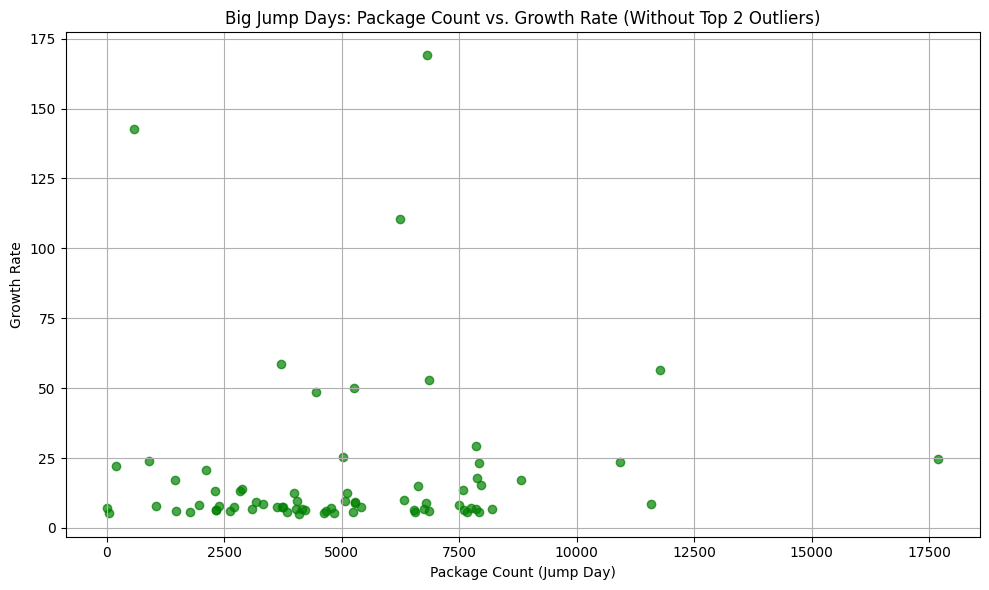

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(jump_days_no_outliers['package_count'], jump_days_no_outliers['growth_rate'], color='green', alpha=0.7)
plt.xlabel('Package Count (Jump Day)')
plt.ylabel('Growth Rate')
plt.title('Big Jump Days: Package Count vs. Growth Rate (Without Top 2 Outliers)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# How many jump days are on promo days, or right after holidays/closures?
context_cols = ['date', 'package_count', 'growth_rate', 'is_promo_day', 'is_after_holiday', 'is_manual_closure']
context_jump_days = jump_days_no_outliers[context_cols]

# Count by context
n_promo = (context_jump_days['is_promo_day'] == 1).sum()
n_after_holiday = (context_jump_days['is_after_holiday'] == 1).sum()
n_manual_closure = (context_jump_days['is_manual_closure'] == 1).sum()

print(f"Big jumps on promo days: {n_promo}")
print(f"Big jumps right after holiday: {n_after_holiday}")
print(f"Big jumps after manual closure: {n_manual_closure}")

# Optionally, display those days for you to check
context_jump_days[(context_jump_days['is_promo_day'] == 1) | 
                  (context_jump_days['is_after_holiday'] == 1) | 
                  (context_jump_days['is_manual_closure'] == 1)]


Big jumps on promo days: 1
Big jumps right after holiday: 0
Big jumps after manual closure: 0


,date,package_count,growth_rate,is_promo_day,is_after_holiday,is_manual_closure
71,2024-11-11,4613,5.406944,1,0,0


In [67]:
# Add those columns to your context view
context_cols_extended = context_cols + ['day_after_closed', 'days_since_promo']

context_jump_days_ext = jump_days_no_outliers[context_cols_extended]

# Count jump days that are the "day after closed"
n_day_after_closed = (context_jump_days_ext['day_after_closed'] == 1).sum()
print(f"Big jumps on the day after a closure: {n_day_after_closed}")

# Display jump days where days_since_promo is small (say, 1 to 3)
recent_promo_jumps = context_jump_days_ext[context_jump_days_ext['days_since_promo'].between(1, 60)]
print(f"Big jumps within 60 days after promo: {recent_promo_jumps.shape[0]}")
display(recent_promo_jumps[['date', 'package_count', 'growth_rate', 'days_since_promo']])

# (Optional) Show full table if you want to scan all jump days with these columns:
display(context_jump_days_ext)


Big jumps on the day after a closure: 0
Big jumps within 60 days after promo: 8


,date,package_count,growth_rate,days_since_promo
66,2023-01-31,7914,5.741056,50.0
65,2024-12-22,6555,5.792746,10.0
56,2024-11-30,7599,6.546177,1.0
46,2024-01-27,3613,7.344111,46.0
31,2023-01-26,5057,9.601677,45.0
14,2024-11-23,10912,23.632054,12.0
6,2024-12-28,11767,56.400000,16.0
2,2024-01-14,6803,169.075000,33.0


,date,package_count,growth_rate,is_promo_day,is_after_holiday,is_manual_closure,day_after_closed,days_since_promo
74,2024-04-01,4096,5.059172,0,0,0,0,111.0
73,2025-05-19,37,5.166667,0,0,0,0,158.0
72,2024-09-25,4835,5.353482,0,0,0,0,288.0
71,2024-11-11,4613,5.406944,1,0,0,0,0.0
70,2024-10-19,7671,5.539642,0,0,0,0,312.0
...,...,...,...,...,...,...,...,...
6,2024-12-28,11767,56.400000,0,0,0,0,16.0
5,2022-04-28,3706,58.774194,0,0,0,0,NaN
4,2022-07-28,6245,110.517857,0,0,0,0,NaN
3,2025-02-25,575,142.750000,0,0,0,0,75.0


In [68]:
# List of China-reroute countries
china_countries = ['SG', 'CZ', 'AE', 'MY', 'CN']

# For each jump day, find the country with the highest package count (the "driver" of the jump)
jump_days_no_outliers['dominant_country'] = jump_days_no_outliers[china_countries].idxmax(axis=1)

# Count how many jumps each country drove
dom_counts = jump_days_no_outliers['dominant_country'].value_counts()
print(dom_counts)

# Show the top jump days with the biggest single-country surges
display(jump_days_no_outliers[['date', 'package_count', 'growth_rate', 'dominant_country'] + china_countries].sort_values('growth_rate', ascending=False).head(10))


dominant_country
SG    35
AE    22
CZ    12
MY     2
CN     2
Name: count, dtype: int64


,date,package_count,growth_rate,dominant_country,SG,CZ,AE,MY,CN
2,2024-01-14,6803,169.075000,CZ,0,6540,0,238,0
3,2025-02-25,575,142.750000,AE,0,0,531,0,3
4,2022-07-28,6245,110.517857,SG,4091,340,9,129,0
5,2022-04-28,3706,58.774194,SG,3368,14,0,40,0
6,2024-12-28,11767,56.400000,AE,1128,3,6521,3991,12
7,2022-07-11,6854,52.968504,SG,3898,2,4,45,19
8,2024-08-22,5264,50.106796,AE,372,3,4108,77,28
9,2024-08-29,4458,48.533333,AE,486,1,3703,26,17
10,2022-06-25,7849,29.305019,SG,6876,4,6,154,0
11,2022-06-11,5017,25.544974,SG,3536,41,0,41,0


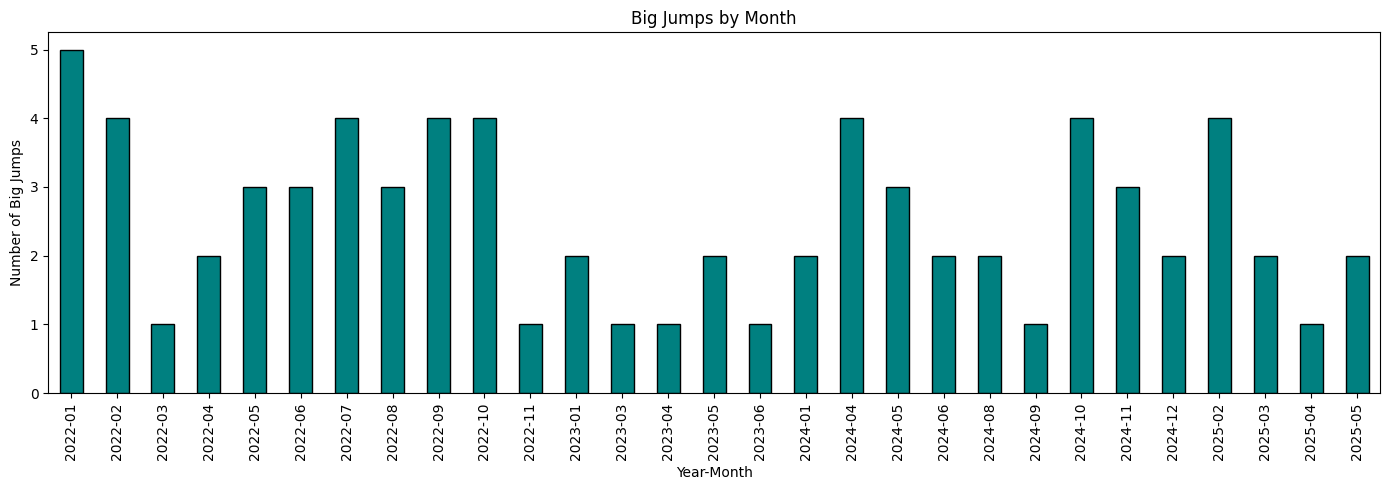

In [69]:
# Convert date if not already datetime
jump_days_no_outliers['date'] = pd.to_datetime(jump_days_no_outliers['date'])
jump_days_no_outliers['year_month'] = jump_days_no_outliers['date'].dt.to_period('M')

# Count jumps per month
jumps_per_month = jump_days_no_outliers.groupby('year_month').size()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
jumps_per_month.plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel('Year-Month')
plt.ylabel('Number of Big Jumps')
plt.title('Big Jumps by Month')
plt.tight_layout()
plt.show()


In [71]:
df.to_csv('regression_df_official.csv', index=False)